# Klasteryzacja gatunków win
## Projekt na Algorytmy Uczenia Maszynowego



Celem projektu jest przeprowadzenie klasteryzacji win, czyli podzielenie ich na trzy grupy na podstawie ich cech charakterystycznych. Klasteryzacja pozwoli na identyfikację naturalnych grup w danych, co może być użyteczne w analizie i kategoryzacji win. Zbiór danych użyty w projekcie - https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering/data. Ten konkretny zbiór został wybrany, gdyż dobrze nadaje się do implementacji algorytmu klasteryzującego. Zbiór danych składa się z z 13 cech chemicznych i fizycznych: 
- **Alcohol** (zawartość alkoholu w %): im wyższa zawartość alkoholu, tym wyższy wpływ wina na odczucie degustatora.
- **Malic_Acid** (kwas jabłkowy): wpływa na ostrzejszy, bardziej cierpki smak wina.
- **Ash** (popiół): mierzy mineralne składniki wina po spaleniu materii organicznej.
- **Ash_Alcalinity** (zasadowość popiołu): wpływa na stabilność wina i jego zdolność do starzenia się.
- **Magnesium** (magnez): wpływa na równowagę smaku i stabilność wina, ważny dla fermentacji.
- **Total_Phenols** (całkowite fenole): wpływają na smak, kolor i właściwości przeciwutleniające wina.
- **Flavanoids** (flawonoidy): mają duży wpływ na kolor i smak wina, szczególnie czerwonych.
- **Nonflavanoid_Phenols** (fenole nieflawonoidowe): wpływają na właściwości organoleptyczne wina, ale w mniejszym stopniu niż flawonoidy.
- **Proanthocyanins** (proantocyjanidyny): przyczyniają się do cierpkości i goryczy wina oraz mają właściwości antyoksydacyjne.
- **Color_Intensity** (intensywność koloru): mierzy głębokość koloru wina.
- **Hue** (odcień): wskaźnik równowagi między kolorami czerwonym i żółtym w winie.
- **OD280/OD315 of diluted wines** (stosunek OD280/OD315 rozcieńczonych win): wskaźnik zawartości fenoli wpływających na właściwości przeciwutleniające wina.
- **Proline** (prolina): aminokwas związany z dojrzałością winogron i procesem fermentacji, wpływa na jakość wina.

Do klasteryzacji użyto 3 algorytmów - K-Means, Hierarhicznego oraz Gaussowskiego. W projekcie również znajduje się wizualizacja podziału danych na skupiska (centroidy) oraz wydzielenie płaszczyzn każdego z klastrów. Ponadto w części wizualizacyjnej widać zestawienie cech win oraz macierze korelacji pokazujących relacje cech poszczególnych klastrów. Pokazany jest również przykład kategoryzacji poszczególnych win.

Najpierw importujemy wszystkie potrzebne do przeprowadzenia eksperymentów i wizualizacji biblioteki

In [90]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


Wczytujemy dane dotyczące wina z pliku CSV o nazwie "wine-clustering.csv" i przeprowadzamy analizę klastrowania przy użyciu algorytmu K-średnich.

In [91]:
data = pd.read_csv("wine-clustering.csv")
import warnings
warnings.filterwarnings("ignore")

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

Do wyznaczenia optymalnej liczby skupisk zastosowano metoda łokciową.

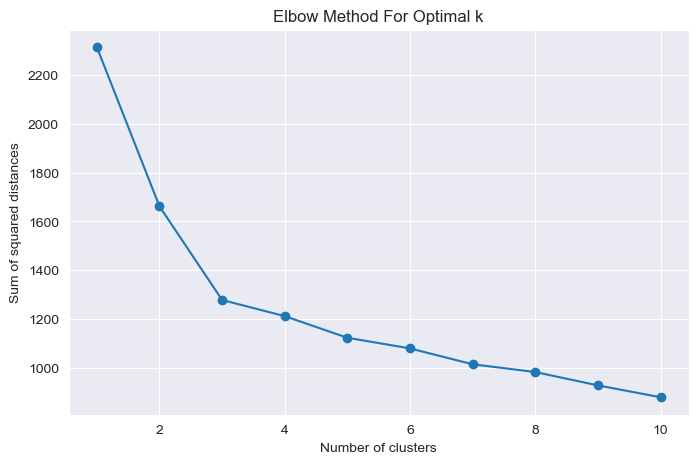

In [92]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
# plt.savefig('plots/elbow_method.png')
plt.show()

Na powyższym wykresie widać, że zgodnie z informacjami podanymi w bazie danych optymalną liczbą skupisk będzie 3 (załamanie wykresu na x=3).

Tworzymy model KMeans (model K-średnich) i dopasowujemy go do naszych danych, wybierając wcześniej określoną liczbę skupisk (zgodnie z powyższymi wynikami optymalna liczba skupisk to 3). 

Dla każdego punktu danych przypisujemy etykietę klastra, do którego został on przypisany przez model. Obliczamy też współczynnik Silhouette, który jest miarą jakości klastryzacji. Współczynnik ten oscyluje od -1 do 1, gdzie wartość bliższa 1 wskazuje na dobrze zdefiniowane klastry.

In [93]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

clusters = kmeans.labels_

num_rows = len(data)
random_row_numbers = random.sample(range(num_rows), 5)

# for row_num in random_row_numbers:
#     row = data_scaled[row_num]
#     row_cluster = kmeans.predict(row.reshape(1, -1))[0]
#     print(f'Wiersz {row_num}: Klaster {row_cluster}')
    
data['Cluster'] = clusters
cluster_means = data.groupby('Cluster').mean()

silhouette_avg = silhouette_score(data_scaled, clusters)
print(f'Silhouette Score (k-means): {silhouette_avg:.4f}')

hier_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_clusters = hier_clustering.fit_predict(data_scaled)

hier_silhouette_avg = silhouette_score(data_scaled, hier_clusters)
print(f'Silhouette Score (Hierarchical Clustering): {hier_silhouette_avg:.4f}')

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(data_scaled)

gmm_silhouette_avg = silhouette_score(data_scaled, gmm_clusters)
print(f'Silhouette Score (Gaussian Mixture Models): {gmm_silhouette_avg:.4f}')

Silhouette Score (k-means): 0.2849
Silhouette Score (Hierarchical Clustering): 0.2774
Silhouette Score (Gaussian Mixture Models): 0.2849


W tej części przeprowadzamy wizualizację klasterów uzyskanych za pomocą algorytmu KMeans. Używamy analizy głównych składowych (PCA) do redukcji wymiarów danych do 2D, co umożliwia łatwą wizualizację.

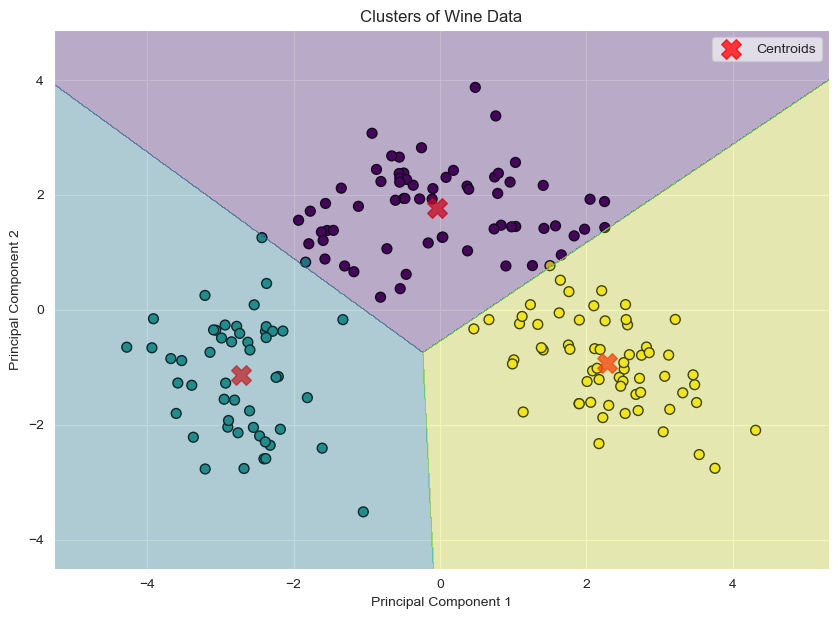

In [94]:
data['Cluster'] = clusters

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters of Wine Data')

centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

x_min, x_max = data_pca[:, 0].min() - 1, data_pca[:, 0].max() + 1
y_min, y_max = data_pca[:, 1].min() - 1, data_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = kmeans.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.legend()

#plt.savefig('plots/clusters.png')
plt.show()

W tej sekcji obliczamy i wizualizujemy macierze korelacji dla poszczególnych klastrów. Analiza macierzy korelacji pozwala zrozumieć zależności między zmiennymi w różnych klastrach. 

Najpierw obliczamy macierze korelacji dla danych należących do każdego klastra. Macierz korelacji pokazuje współczynniki korelacji między wszystkimi parami cech w danym klastrze, co pozwala zrozumieć, jak zmienne są ze sobą powiązane w ramach poszczególnych klastrów.

Tworzymy mapy cieplne (heatmapy) dla macierzy korelacji każdego klastra, co umożliwia wizualne porównanie wzorców korelacji między klastrami. 

Mapy cieplne przedstawiają korelacje między cechami jako kolorowe bloki, gdzie kolor wskazuje siłę korelacji. Kolory mogą być używane do szybkiej identyfikacji silnych dodatnich lub ujemnych korelacji. Porównując mapy cieplne różnych klastrów, można zidentyfikować różnice w zależnościach między cechami w poszczególnych klastrach. 

Analiza klastrów:

Klaster 0

Silne Korelacje: W klastrze 0 widać kilka silnych korelacji dodatnich, na przykład między Flavanoids a OD280, a także między Proline a Alcohol.
Ujemne Korelacje: Niektóre cechy wykazują ujemne korelacje, jak na przykład Malic_Acid z OD280.
Interpretacja: Te korelacje mogą wskazywać na wspólne cechy grupy win w klastrze 0, gdzie pewne właściwości chemiczne są ze sobą ściśle powiązane.

Klaster 1

Silne Korelacje: Klaster 1 pokazuje silną dodatnią korelację między Flavanoids a OD280, podobnie jak w klastrze 0. Istnieją również inne istotne korelacje, jak między Proline a Alcohol.
Słabsze Korelacje: Niektóre korelacje są słabsze w porównaniu do innych klastrów, co może sugerować większą zmienność cech w tym klastrze.
Interpretacja: Różnice w korelacjach w stosunku do innych klastrów mogą wskazywać na różne profile chemiczne wina w tej grupie.

Klaster 2

Unikalne Korelacje: Klaster 2 wykazuje unikalne korelacje, takie jak silna dodatnia korelacja między Ash_Alcanity a Ash. Również korelacja między Malic_Acid a OD280 jest widoczna, ale w różnym stopniu w porównaniu do innych klastrów.
Silne i Słabe Korelacje: W klastrze 2 występują zarówno silne dodatnie, jak i ujemne korelacje, co może wskazywać na różnorodność chemicznych właściwości win w tej grupie.
Interpretacja: Wzorce korelacji w klastrze 2 mogą odzwierciedlać specyficzne właściwości win, które odróżniają je od win w innych klastrach.

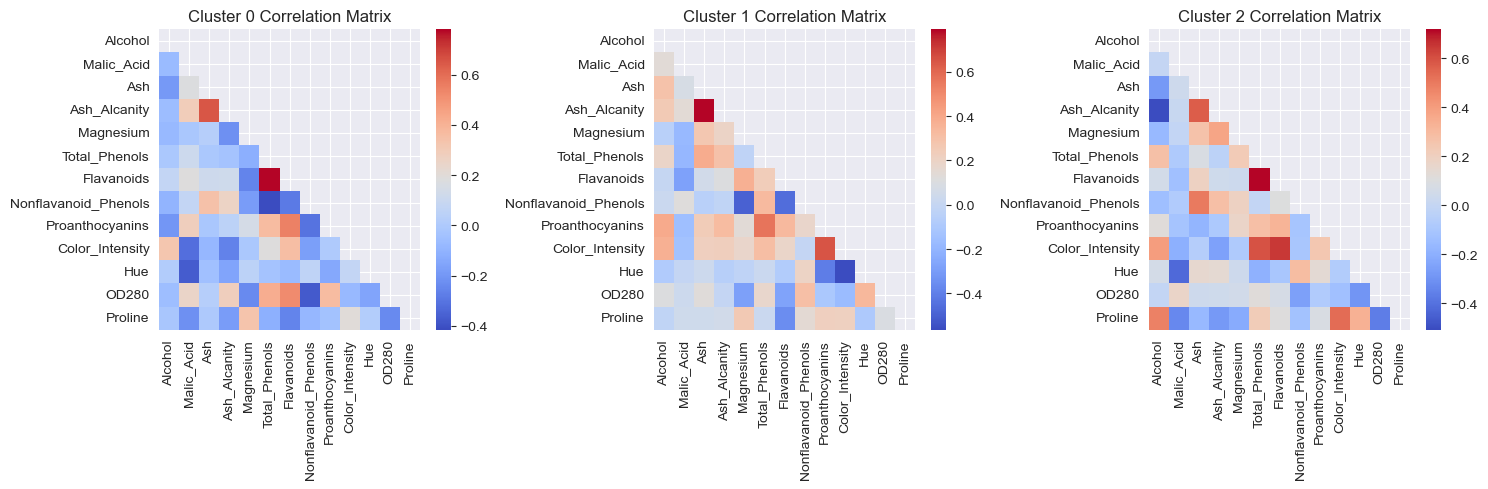

In [95]:
cluster_correlation_matrices = {}
for cluster_label in np.unique(clusters):
    cluster_data = data.loc[clusters == cluster_label].drop(columns='Cluster', errors='ignore')
    cluster_correlation_matrices[cluster_label] = cluster_data.corr()

plt.figure(figsize=(15, 5))
for i, (cluster_label, correlation_matrix) in enumerate(cluster_correlation_matrices.items(), 1):
    plt.subplot(1, 3, i)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, cmap='coolwarm', mask=mask, cbar=True)
    plt.title(f'Cluster {cluster_label} Correlation Matrix')

plt.tight_layout()
plt.show()


W tej części notatnika generujemy wykresy rozrzutu dla wszystkich możliwych par cech w danych, aby zobaczyć, jak cechy są ze sobą powiązane w kontekście klasteryzacji.

Każdy wykres pokazuje punkty danych dla dwóch cech. Kolory punktów odpowiadają klastrom, do których dane punkty należą, co umożliwia wizualne zrozumienie, jak klastery są rozłożone w odniesieniu do tych dwóch cech. Niektóre pary cech mogą wykazywać wyraźne granice między klastrami, podczas gdy inne mogą pokazywać bardziej złożone lub nakładające się wzorce. W niektórych przypadkach, jeżeli klastery są dobrze odseparowane, wykresy mogą pokazać wyraźne granice między różnymi klastrami, co pomaga w zrozumieniu, jak dobrze model klasteryzacji zadziałał.

In [96]:
# feature_names = data.columns.tolist()
# import itertools
# # os.makedirs("plots/feature_pairs", exist_ok=True)
# 
# for i, j in itertools.combinations(range(data.shape[1]), 2):
#     feature_i = feature_names[i]
#     feature_j = feature_names[j]
# 
#     plt.figure(figsize=(6, 4))
#     plt.scatter(data[feature_i], data[feature_j], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
#     plt.xlabel(feature_i)
#     plt.ylabel(feature_j)
#     plt.title(f"{feature_i} vs {feature_j}")
# 

#     plot_filename = f"plots/feature_pairs/{feature_i}_vs_{feature_j}.png"
#     #plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
#     #plt.show()
# 
# # print("Scatter plots for all feature pairs have been saved in the 'plots/feature_pairs' directory.")

W tej sekcji generujemy wykres par cech (pair plot), aby zwizualizować zależności między wszystkimi parami cech w danych, z uwzględnieniem klasterów. Pair plot jest potężnym narzędziem do analizowania struktury danych i identyfikacji wzorców klasteryzacji.

<Figure size 1200x1000 with 0 Axes>

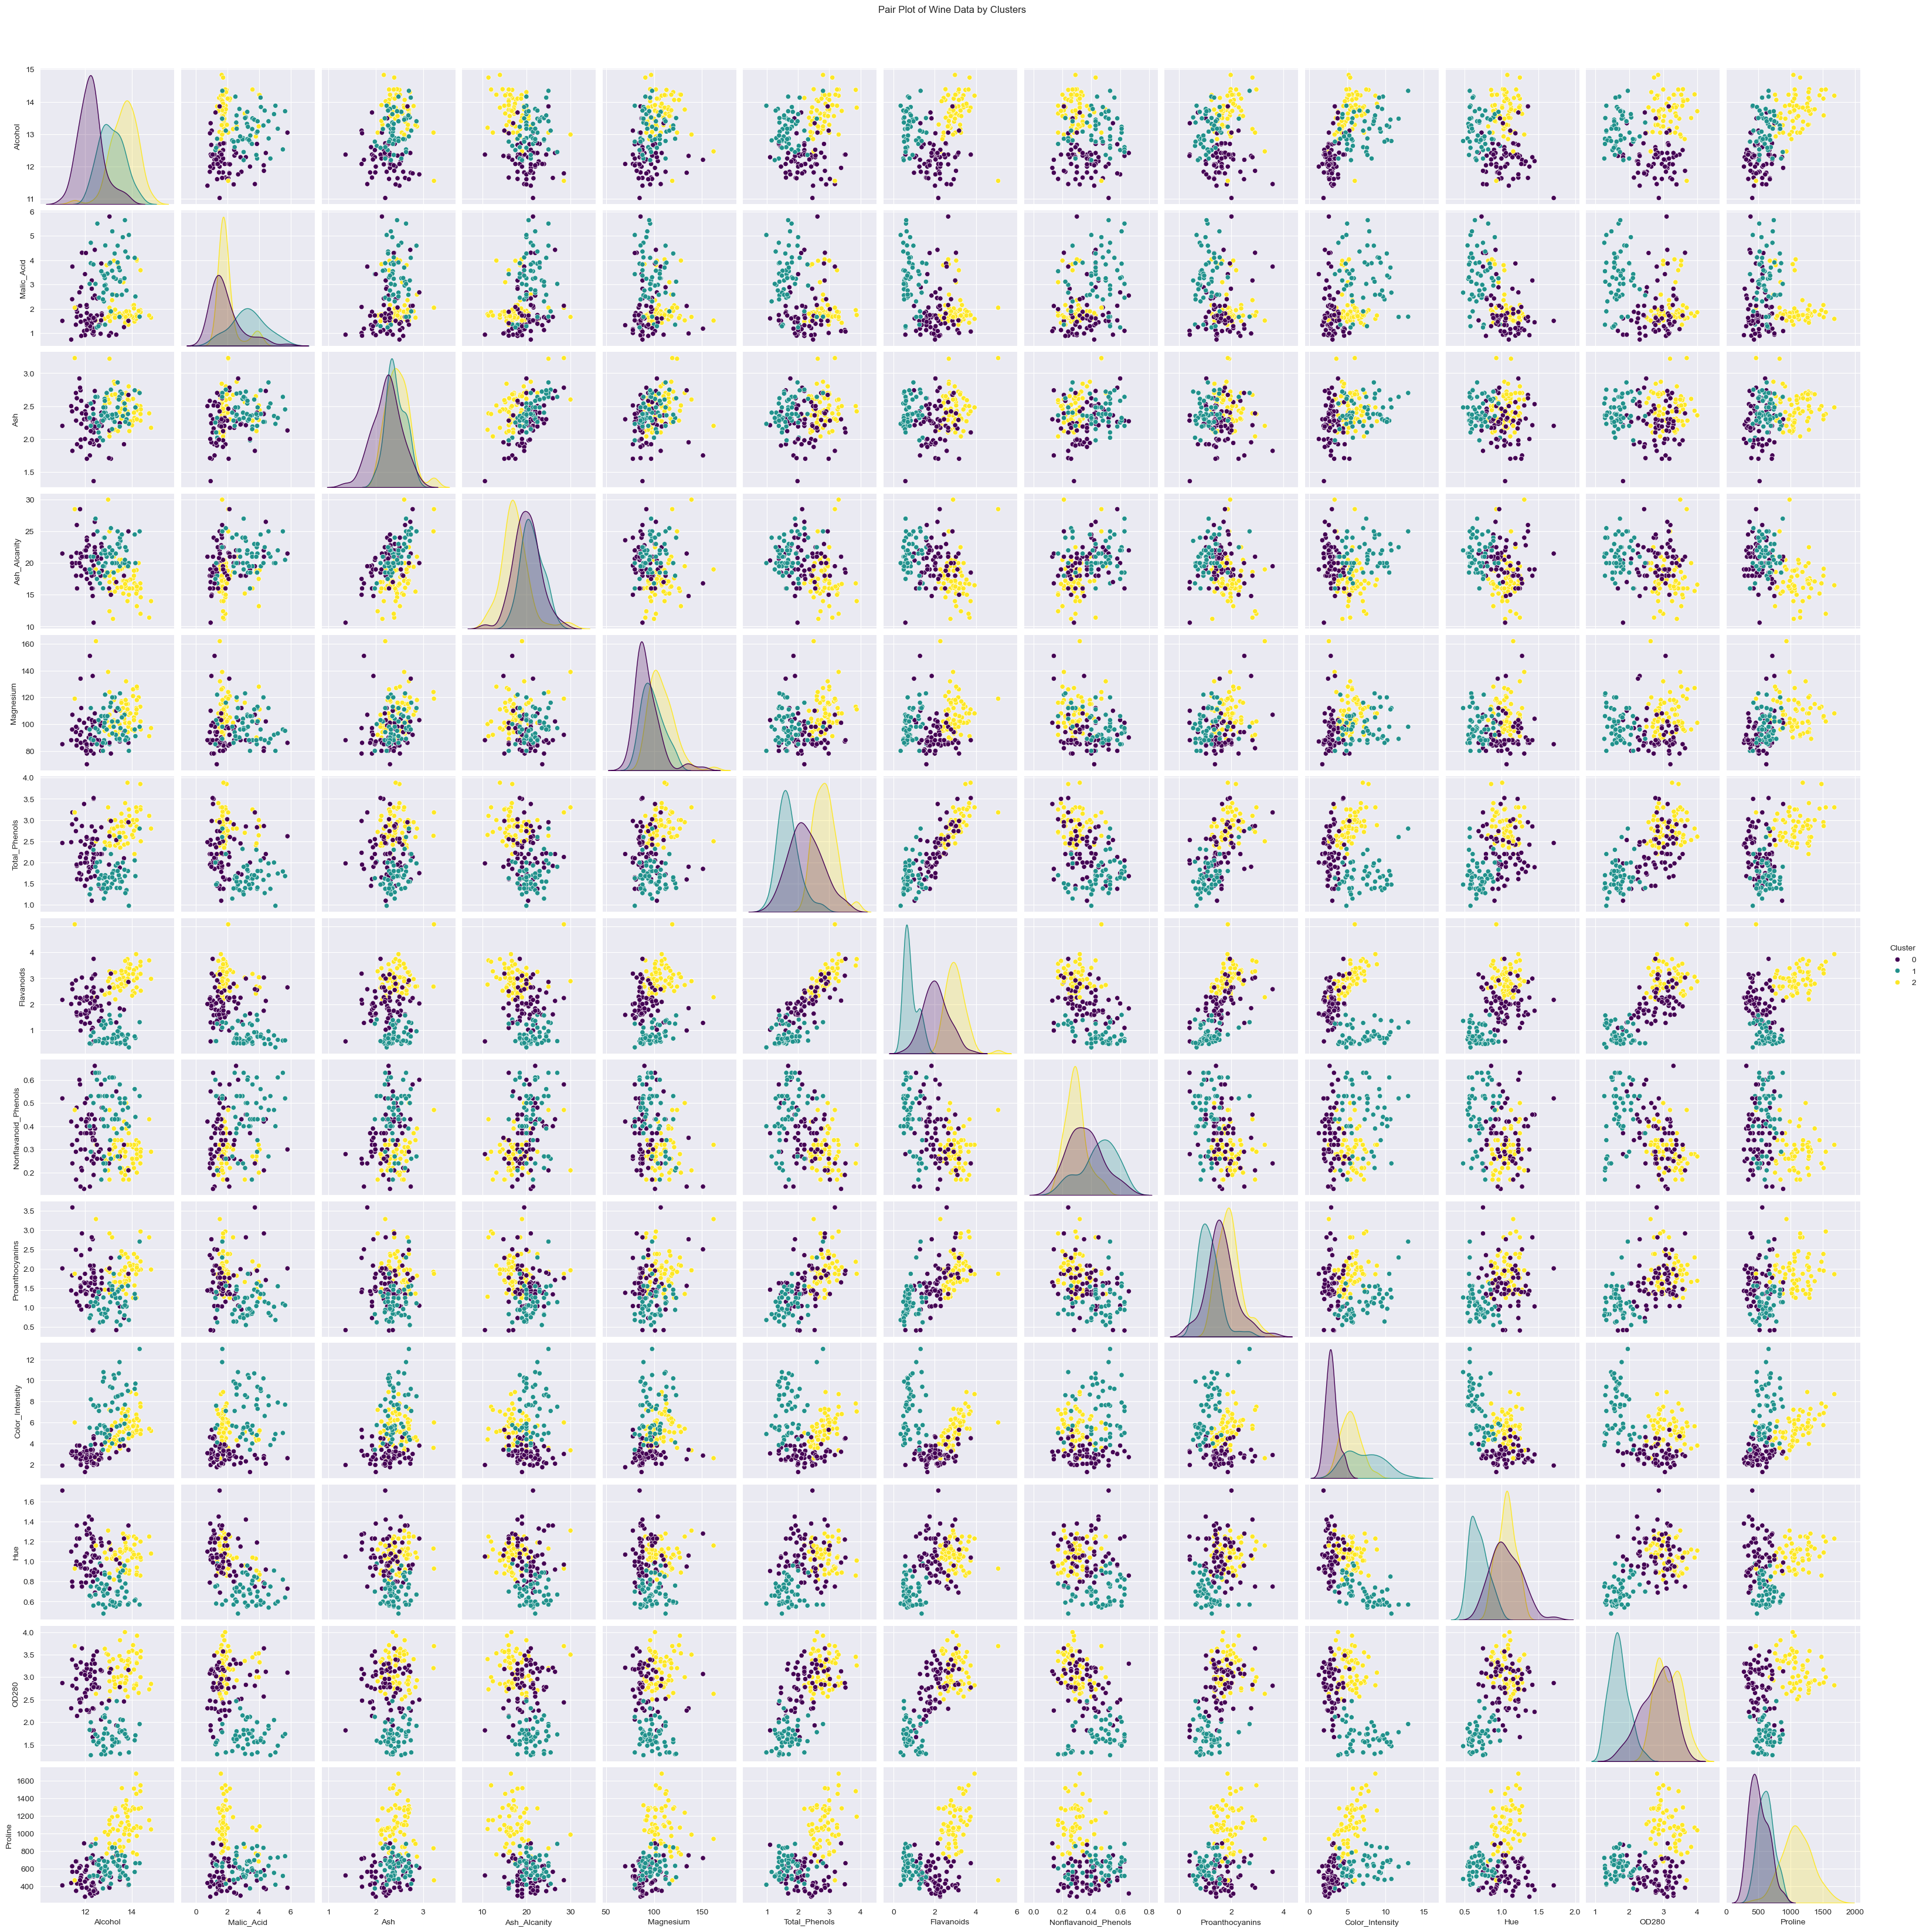

In [97]:
plt.figure(figsize=(12, 10))
sns.pairplot(data, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Wine Data by Clusters', y=1.02)
plt.show()
#plt.savefig('plots/Pairplot.png')


In [98]:
num_rows = len(data)
random_row_numbers = random.sample(range(num_rows), 5)

for row_num in random_row_numbers:
    row = data_scaled[row_num]
    row_cluster = kmeans.predict(row.reshape(1, -1))[0]
    print(f'Wiersz {row_num}: Klaster {row_cluster}')

Wiersz 19: Klaster 2
Wiersz 66: Klaster 0
Wiersz 83: Klaster 1
Wiersz 78: Klaster 0
Wiersz 1: Klaster 2


In [99]:
print(cluster_means.to_string(index=False))

  Alcohol  Malic_Acid      Ash  Ash_Alcanity  Magnesium  Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity      Hue    OD280     Proline
12.250923    1.897385 2.231231     20.063077  92.738462       2.247692    2.050000              0.357692         1.624154         2.973077 1.062708 2.803385  510.169231
13.134118    3.307255 2.417647     21.241176  98.666667       1.683922    0.818824              0.451961         1.145882         7.234706 0.691961 1.696667  619.058824
13.676774    1.997903 2.466290     17.462903 107.967742       2.847581    3.003226              0.292097         1.922097         5.453548 1.065484 3.163387 1100.225806


Podsumowanie:
- W projekcie przeprowadzono klasteryzację win za pomocą trzech algorytmów: KMeans, Hierarchical Clustering i Gaussian Mixture Models.
- Zastosowano analizę głównych składowych (PCA) do redukcji wymiarów danych do 2D w celu wizualizacji klastrów.
- Obliczono współczynnik Silhouette dla każdego algorytmu klasteryzacji, aby ocenić jakość klastryzacji.
- Przeprowadzono analizę macierzy korelacji dla poszczególnych klastrów, aby zrozumieć zależności między cechami w różnych grupach win.
- Stworzono pair plot, aby zwizualizować zależności między wszystkimi parami cech w danych, z uwzględnieniem klasterów.
- Przeprowadzono analizę klastrów, aby zidentyfikować unikalne wzorce i zależności między cechami w poszczególnych grupach win.
- Przeprowadzono kategoryzację kilku losowo wybranych win, aby zobaczyć, do których klastrów zostały one przypisane.
- Wyniki analizy wskazują na istnienie trzech naturalnych grup win, które różnią się pod względem cech chemicznych i fizycznych. Klaster 1 charakteryzuje się umiarkowaną zawartością alkoholu i kwasowości, co sugeruje, że mogą to być wytrawne lub półwytrawne wina białe lub różowe o lekkim ciele, prawdopodobnie z owocowymi nutami ze względu na średnią zawartość fenoli. Klaster 2 wydaje się reprezentować wytrawne czerwone wina o średnim ciele i mniej złożonym profilu smakowym, z wyższą zawartością alkoholu i kwasu winowego, ale niższą zawartością fenoli i flawonoidów. Natomiast Klaster 3 to prawdopodobnie intensywne, eleganckie i kompleksowe wytrawne lub półwytrawne czerwone wina do długiego starzenia, charakteryzujące się najwyższą zawartością fenoli, flawonoidów, wyższą kwasowością oraz bogatym profilem smakowym.